<a href="https://colab.research.google.com/github/Jasmine-kaur8/Avocado_Project/blob/main/Avocado(Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from google.colab import files
uploaded = files.upload()       

Saving avocado(project).csv to avocado(project) (1).csv


Uploading the csv file

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

Importing required libraries

In [57]:
data = pd.read_csv('avocado(project).csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Reading the data

In [58]:
data.shape

(18249, 14)

The Avocado project has 18249 rows and 14 columns

In [59]:
data.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no null value in the data

In [60]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


There are ouliers in all the features except year.

In [61]:
data.drop('Unnamed: 0' , axis = 1, inplace = True)

Droping the column Unnamed: 0

In [62]:
data.shape

(18249, 13)

After droping the column Unnamed: 0, the data has 18249 rows and 13 columns.



In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Date, type and region are object type. All other variables are float.

In [64]:
data.Date.count()

18249

There are 18249 ddifferent dates, it  implies that we encode the date as there are no duplicates.

In [65]:
data.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

There are 9126 conventional type of avocado and 9123 are organic type of avocado

In [66]:
data.region.value_counts()

Indianapolis           338
DallasFtWorth          338
Orlando                338
BuffaloRochester       338
Charlotte              338
Southeast              338
GrandRapids            338
Spokane                338
Houston                338
Albany                 338
MiamiFtLauderdale      338
West                   338
Denver                 338
Philadelphia           338
HartfordSpringfield    338
GreatLakes             338
NorthernNewEngland     338
CincinnatiDayton       338
Northeast              338
Portland               338
SanFrancisco           338
NewYork                338
Atlanta                338
Louisville             338
NewOrleansMobile       338
RichmondNorfolk        338
Syracuse               338
Boise                  338
Nashville              338
Detroit                338
TotalUS                338
StLouis                338
Chicago                338
Tampa                  338
SouthCentral           338
LosAngeles             338
Sacramento             338
C

The avacodo is almost equally distributed in all the regions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7efc67c50>,
      dtype=object)

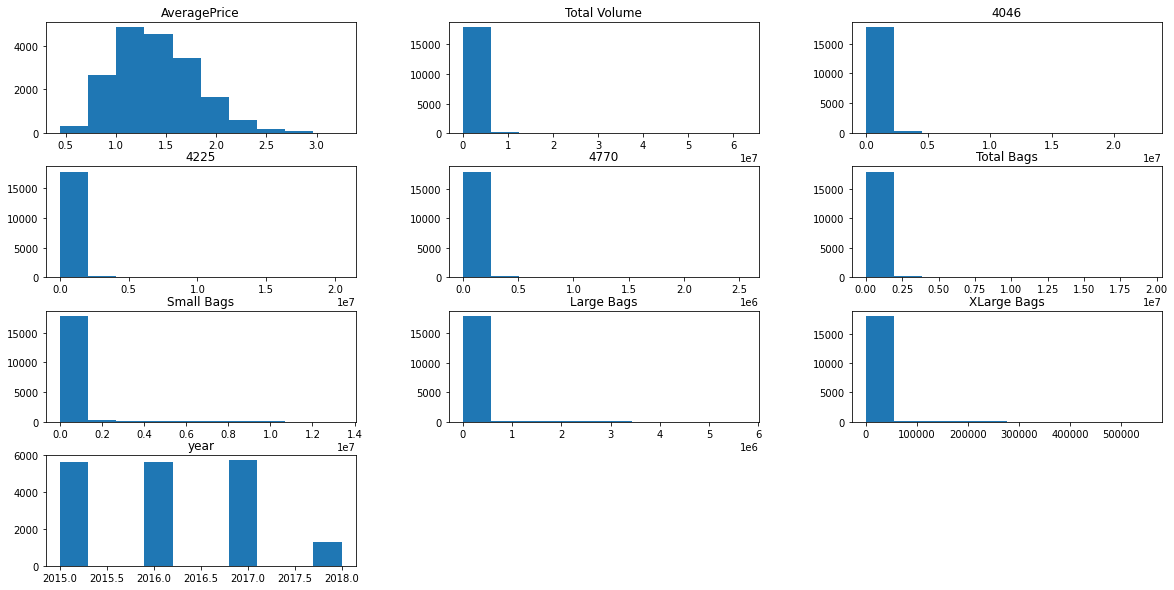

In [67]:
 data.hist(figsize = (20,10), grid = False)

The data is very skewed for all the variables, except AveragePrice and year.

In [68]:
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

Skewness is greater than 0.5 for all the variables, except AveragePrice and year.

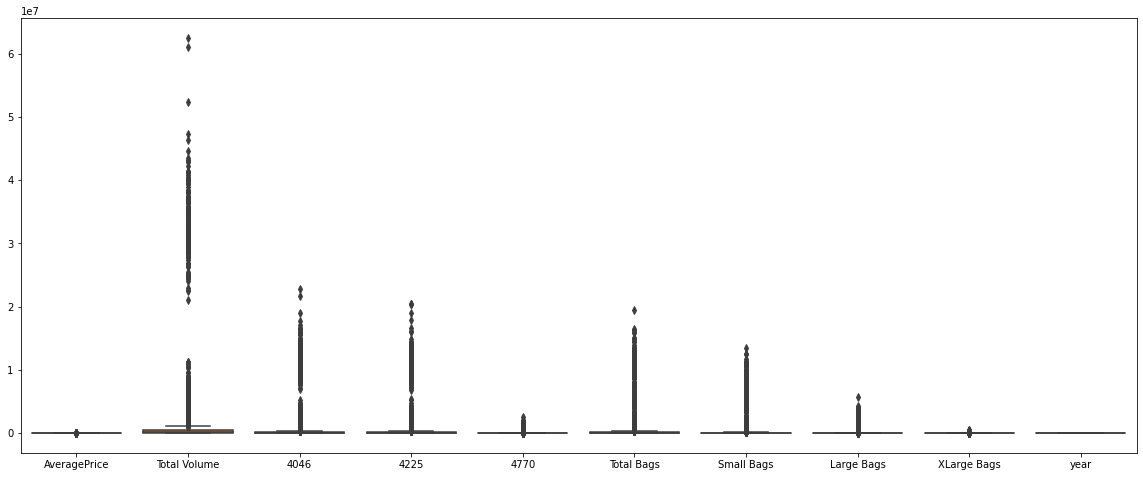

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.boxplot(data = data, ax=ax)
plt.show()

The boxplot shows that total volume has highest number of ouliers. Also, all the variables have outliers except AveragePrice and year.

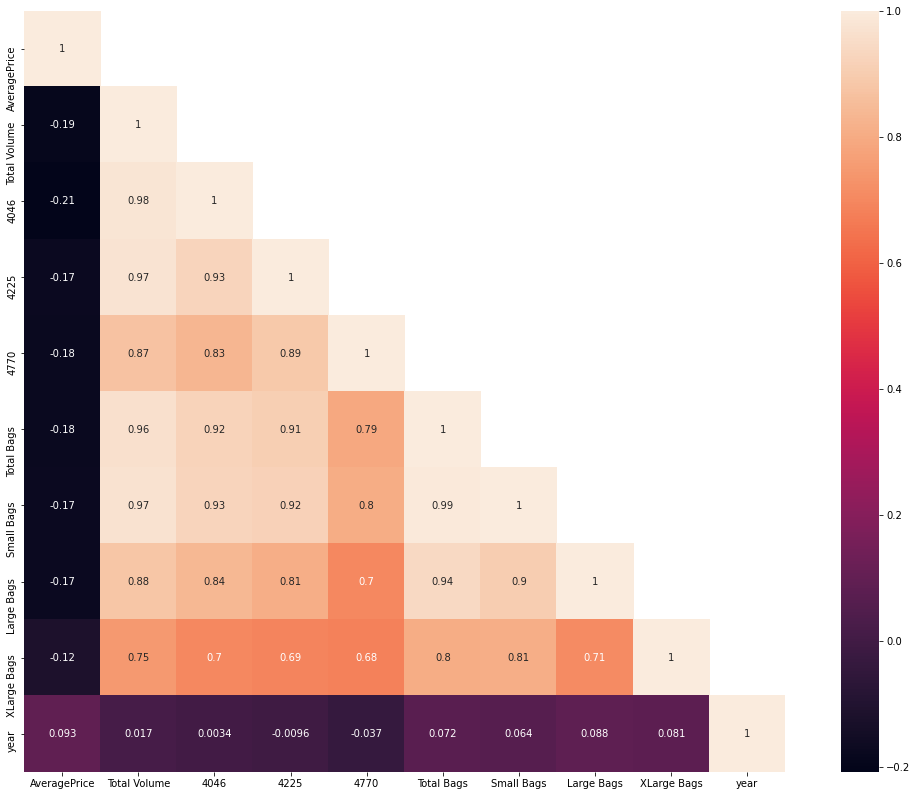

In [70]:
#Correlation Matrix

corr_mat = data.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)] = False

fig = plt.gcf()
fig.set_size_inches(20,14)
sns.heatmap(data = corr_mat, mask = m, square = True, annot = True, cbar = True)

Total volume and total bags are highly correlated with all other features. Also, small bags is highly correlated with large bags and Xlarge bags. Similarly, PLUs are correlated with each other.

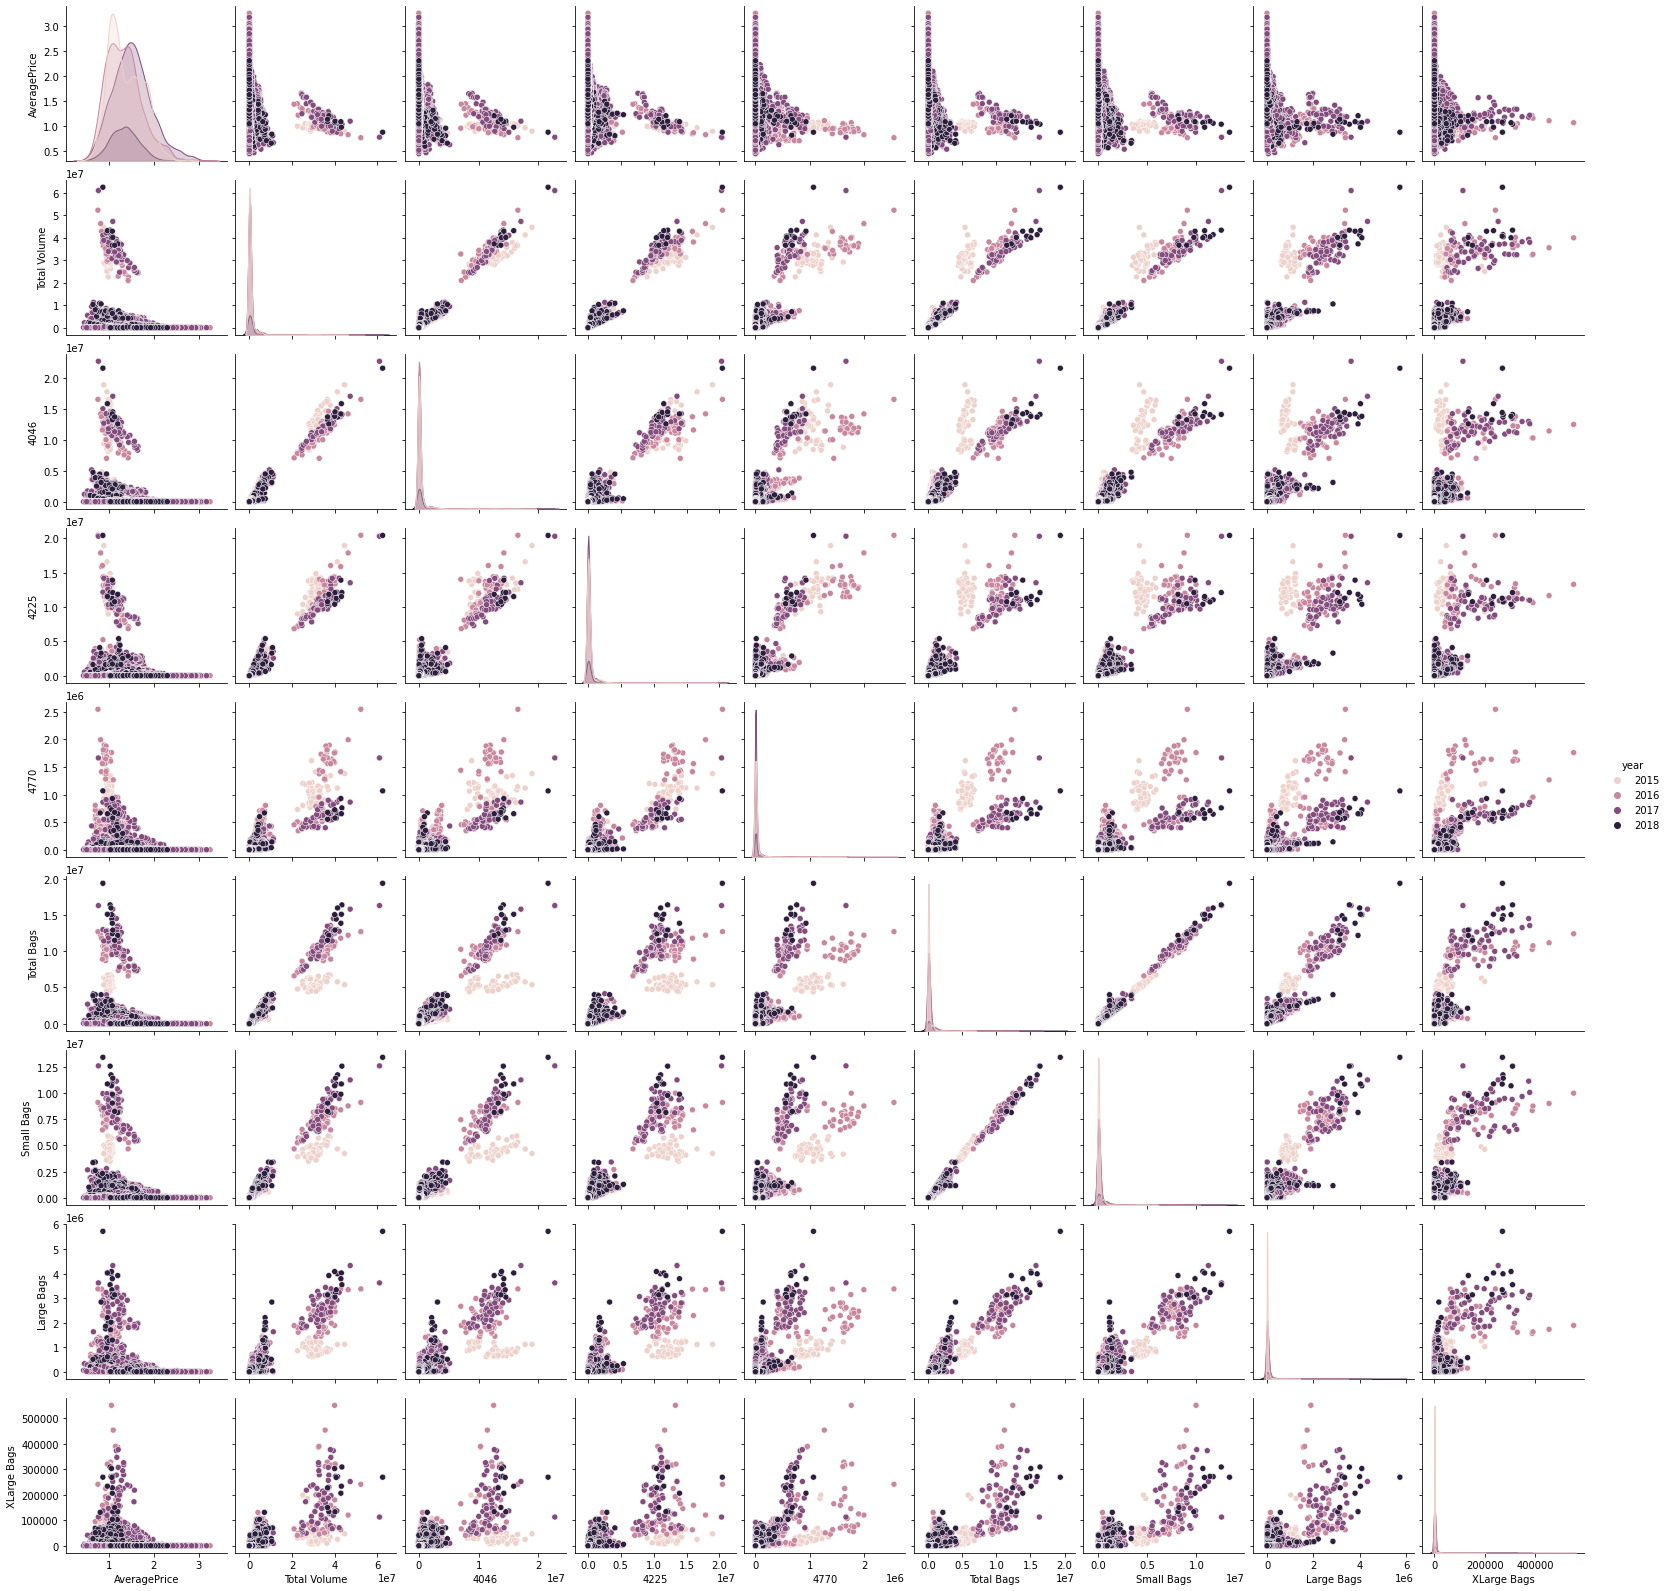

In [71]:
sns.pairplot(data, hue = 'year')

Small bags and total bags shows very high correlation. Total volumn and other features are also highly correlated.

In [72]:
data1 = data.drop(columns = ['Total Volume','Total Bags', 'XLarge Bags'], axis = 1) 

Droping the variables: 'Total Volume','Total Bags', 'XLarge Bags' as these are highly correlated with other features, thus leading to multicollinearity problem.

In [73]:
data1

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,type,year,region
0,27-12-15,1.33,1036.74,54454.85,48.16,8603.62,93.25,conventional,2015,Albany
1,20-12-15,1.35,674.28,44638.81,58.33,9408.07,97.49,conventional,2015,Albany
2,13-12-15,0.93,794.70,109149.67,130.50,8042.21,103.14,conventional,2015,Albany
3,06-12-15,1.08,1132.00,71976.41,72.58,5677.40,133.76,conventional,2015,Albany
4,29-11-15,1.28,941.48,43838.39,75.78,5986.26,197.69,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...
18244,04-02-18,1.63,2046.96,1529.20,0.00,13066.82,431.85,organic,2018,WestTexNewMexico
18245,28-01-18,1.71,1191.70,3431.50,0.00,8940.04,324.80,organic,2018,WestTexNewMexico
18246,21-01-18,1.87,1191.92,2452.79,727.94,9351.80,42.31,organic,2018,WestTexNewMexico
18247,14-01-18,1.93,1527.63,2981.04,727.01,10919.54,50.00,organic,2018,WestTexNewMexico


The dataset after droping: 'Total Volume','Total Bags', 'XLarge Bags'

In [74]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

Initializing label encoder

In [75]:
a = lab_enc.fit_transform(data1['region'])

Encoding region column

In [76]:
b = lab_enc.fit_transform(data1['year'])

Encoding year column

In [77]:
c= lab_enc.fit_transform(data1['type'])

Encoding type column

In [78]:
d = lab_enc.fit_transform(data1['Date'])

Encoding Date column

In [79]:
data1['region'] = a
data1['year'] = b
data1['type'] = c
data1['Date'] = d
data1

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,type,year,region
0,150,1.33,1036.74,54454.85,48.16,8603.62,93.25,0,0,0
1,111,1.35,674.28,44638.81,58.33,9408.07,97.49,0,0,0
2,72,0.93,794.70,109149.67,130.50,8042.21,103.14,0,0,0
3,33,1.08,1132.00,71976.41,72.58,5677.40,133.76,0,0,0
4,160,1.28,941.48,43838.39,75.78,5986.26,197.69,0,0,0
...,...,...,...,...,...,...,...,...,...,...
18244,17,1.63,2046.96,1529.20,0.00,13066.82,431.85,1,3,53
18245,151,1.71,1191.70,3431.50,0.00,8940.04,324.80,1,3,53
18246,112,1.87,1191.92,2452.79,727.94,9351.80,42.31,1,3,53
18247,73,1.93,1527.63,2981.04,727.01,10919.54,50.00,1,3,53


Substituting the encoded values in the dataset

In [80]:
pt = sklearn.preprocessing.PowerTransformer(standardize=True, copy=True)

Initializing power transformation

In [81]:
print(pt.fit(data1))

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)


Fitting the data

In [82]:
data2 = (pt.transform(data1))

Applying transform to the data

In [83]:
data3 = pd.DataFrame(data2)
data3

,0,1,2,3,4,5,6,7,8,9
0,1.262570,-0.086248,-0.658619,0.307313,-0.247250,-0.340627,-0.773351,-0.999836,-1.308421,-2.011552
1,0.597066,-0.034022,-0.776870,0.231647,-0.201041,-0.306425,-0.763435,-0.999836,-1.308421,-2.011552
2,-0.139798,-1.273938,-0.731947,0.579503,-0.007072,-0.366303,-0.750820,-0.999836,-1.308421,-2.011552
3,-1.006338,-0.793421,-0.634200,0.415100,-0.148322,-0.496853,-0.691865,-0.999836,-1.308421,-2.011552
4,1.424878,-0.219440,-0.685293,0.224806,-0.137918,-0.477201,-0.600975,-0.999836,-1.308421,-2.011552
...,...,...,...,...,...,...,...,...,...,...
18244,-1.442074,0.640729,-0.467366,-0.919470,-1.238310,-0.178839,-0.410859,1.000164,1.703053,1.543838
18245,1.278936,0.816307,-0.619883,-0.665372,-1.238310,-0.325977,-0.481465,1.000164,1.703053,1.543838
18246,0.614883,1.147790,-0.619831,-0.772496,0.401546,-0.308728,-0.943486,1.000164,1.703053,1.543838
18247,-0.119678,1.265876,-0.550282,-0.710543,0.401246,-0.248932,-0.908510,1.000164,1.703053,1.543838


The dataset after power transformation

In [84]:
data4 = data3.rename(columns={'0': 'Date',
                             1: 'AveragePrice',
                             2: '4046',
                             3: '4225',
                             4: '4770',
                             5: 'Small Bags',
                             6: 'Large Bags',
                             7: 'type',
                             8: 'year',
                             9: 'region'})
data4

,0,AveragePrice,4046,4225,4770,Small Bags,Large Bags,type,year,region
0,1.262570,-0.086248,-0.658619,0.307313,-0.247250,-0.340627,-0.773351,-0.999836,-1.308421,-2.011552
1,0.597066,-0.034022,-0.776870,0.231647,-0.201041,-0.306425,-0.763435,-0.999836,-1.308421,-2.011552
2,-0.139798,-1.273938,-0.731947,0.579503,-0.007072,-0.366303,-0.750820,-0.999836,-1.308421,-2.011552
3,-1.006338,-0.793421,-0.634200,0.415100,-0.148322,-0.496853,-0.691865,-0.999836,-1.308421,-2.011552
4,1.424878,-0.219440,-0.685293,0.224806,-0.137918,-0.477201,-0.600975,-0.999836,-1.308421,-2.011552
...,...,...,...,...,...,...,...,...,...,...
18244,-1.442074,0.640729,-0.467366,-0.919470,-1.238310,-0.178839,-0.410859,1.000164,1.703053,1.543838
18245,1.278936,0.816307,-0.619883,-0.665372,-1.238310,-0.325977,-0.481465,1.000164,1.703053,1.543838
18246,0.614883,1.147790,-0.619831,-0.772496,0.401546,-0.308728,-0.943486,1.000164,1.703053,1.543838
18247,-0.119678,1.265876,-0.550282,-0.710543,0.401246,-0.248932,-0.908510,1.000164,1.703053,1.543838


Renaming the columns with original names

In [85]:
data4.skew()

0              -0.277830
AveragePrice    0.005596
4046           -0.022679
4225           -0.017740
4770            0.032184
Small Bags      0.007058
Large Bags     -0.073809
type            0.000329
year           -0.091946
region         -0.261443
dtype: float64

The skewness lies between (-5,5) for all the variables. This means that the problem of skewness has been solved.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7ed5b1450>,
      dtype=object)

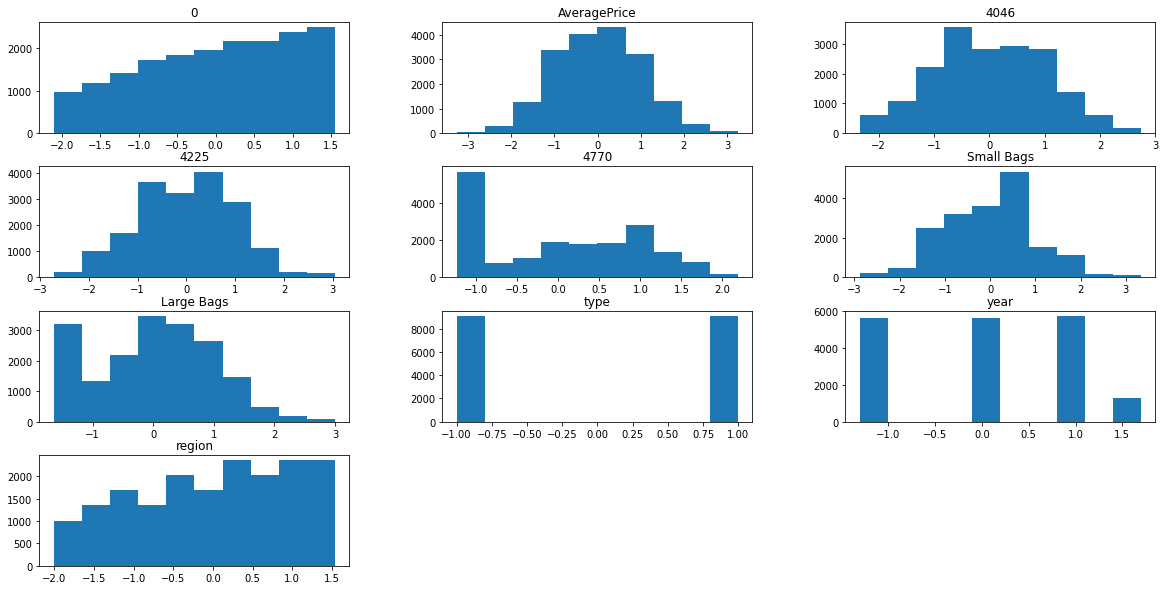

In [86]:
 data4.hist(figsize = (20,10), grid = False)

The data seems to be normally distributed

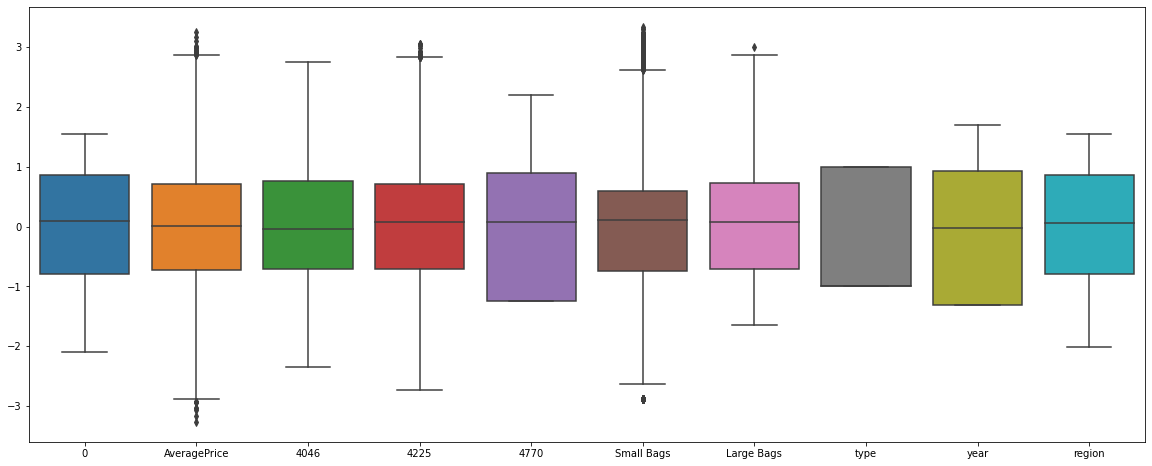

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.boxplot(data = data4, ax=ax)
plt.show()

Very few outliers left

In [88]:
data4.drop(['4225', 'Small Bags'], axis = 1, inplace = True)

Droping the columns 4225 and small bags as it may lead to overfitting of the model

In [89]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scaled = scalar.fit_transform(data4)

Applying standard scaler

In [90]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = data4.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]


Creating a dataframe of VIF

In [91]:
vif

,Features,vif
0,0,1.002547
1,AveragePrice,1.866248
2,4046,3.218422
3,4770,3.407733
4,Large Bags,2.002748
5,type,3.414280
6,year,1.125334
7,region,1.093851


The VIF is less 5 for all the variables, this implies that there is no problem of multicollinearity

In [92]:
y = data4['AveragePrice']
x = data4.drop(columns = ['AveragePrice'])

Spliting the data into independent and dependent variable

In [93]:
#model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.25, random_state=35)


models = [LinearRegression(), RandomForestRegressor(),
          KNeighborsRegressor(n_neighbors = 4), GradientBoostingRegressor()]
model_names = ['LR','RF', 'KNN','GB']

r2 = []
mse = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    r2.append(r2_score(Y_test,pred))
    mse.append(mean_squared_error(Y_test,pred))
    

models = {'Modelling Algorithm': model_names, 'r2 score': r2, 'MSE' : mse}
models_df = pd.DataFrame(models)
models_df

,Modelling Algorithm,r2 score,MSE
0,LR,0.459910,0.537652
1,RF,0.798010,0.201078
2,KNN,0.619552,0.378731
3,GB,0.653107,0.345327


Model building is completed and r2 score and MSE are calculated for each of the algorithm

In [94]:
#cross validation 

from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.25, random_state=35)

models = [LinearRegression(), RandomForestRegressor(),
          KNeighborsRegressor(n_neighbors = 4), GradientBoostingRegressor()]
model_names = ['LR','RF', 'KNN','GB']


k_f = KFold(n_splits = 4, shuffle = True)
k_f

CV_S = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    CV_S.append(cross_val_score(c, x, y, cv = 5).mean())
    

CV = {'Modelling Algorithm': model_names, 'CV SCORE': CV_S}
CV_df = pd.DataFrame(CV)
CV_df

,Modelling Algorithm,CV SCORE
0,LR,0.081261
1,RF,0.181196
2,KNN,0.027154
3,GB,0.338613


The cross validation score is low, implying that there is problem of overfitting

In [95]:

#Comparing CV Score and the r2 score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['r2 score'] = r2
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [r2[0] - CV_S[0], r2[1] - CV_S[1], r2[2] - CV_S[2], r2[3] - CV_S[3]]
Comparison

,Modelling Algorithm,r2 score,CV SCORE,Difference
0,LR,0.459910,0.081261,0.378649
1,RF,0.798010,0.181196,0.616814
2,KNN,0.619552,0.027154,0.592398
3,GB,0.653107,0.338613,0.314494


The minimum distance between the r2 score and the CV score is for the Gradient Boosting Regressor. Thus, we will use this model for hyperparameter tuning

In [96]:
#HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV

grid_param = {
    'loss' : ['ls', 'lad','huber','quantile'],
    'learning_rate' : [0.1,0.2,0.25],
    'n_estimators' : [100, 50],
    'min_samples_split' : range(1,5)
}

Providing parameters for the model

In [97]:
grid = GridSearchCV(GradientBoostingRegressor(), param_grid = grid_param)

Initializing grid search CV


In [98]:
grid.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                            

Training the model

In [99]:
best_parameters = grid.best_params_
print(best_parameters)

{'learning_rate': 0.25, 'loss': 'ls', 'min_samples_split': 2, 'n_estimators': 100}


Got the best parameters

In [101]:
#FINAL MODEL
#Substituting the best parameters in the  GradientBoostingRegressor:

gb =  GradientBoostingRegressor(loss = 'ls', learning_rate = 0.25, n_estimators = 100, min_samples_split = 2)

gb.fit(X_train, Y_train)
pred = gb.predict(X_test)
rscore = r2_score(Y_test, pred)
rscore

0.7324573887477425

The r2 score after the hyperparameter tuning is 73.2%.

In [102]:
#SAVING THE MODEL:

import joblib
joblib.dump(gb, 'Avocado_final_model.pkl')

['Avocado_final_model.pkl']

Saved the model